### Testing gradient boosted trees for the three fire types

In [1]:
import Modelling_tools as MT
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("/Users/rmartinshort/Documents/Insight/Project/census_block_prediction/Fully_merged_dataset_Autogenerated_plus.csv")

In [3]:
#Do something about the NaNs
dataset['UnkownUseType'].fillna(1,inplace=True)
dataset['S'].fillna(1,inplace=True)
values = {'COMH':0, 'COMM':0, 'COMO':0, 'COMR':0, 'GOVT':0, 'IND':0, 'MISC':0,
       'MRES':0, 'SRES':0, 'A':0, 'B':0, 'C':0, 'D':0}
dataset = dataset.fillna(value=values)
dataset.fillna(dataset.mean(),inplace=True)

In [4]:
dataset.drop(['IDyear_x.1'],inplace=True,axis=1)

### Predicting structural fires 

In [5]:
#Note that Xholdout and holdout are the same, only holdout contains a column that allows
#it to be joined to a geo dataframe for plotting
X,y,Xholdout,yholdout,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='SF_pred',yearto_holdout=2018)

In [9]:
#Parameters to search over for gradient boosting
test_parameters = {
    
    'classify__n_estimators': (5,10,20),
    'classify__learning_rate': (0.1,0.5),
    'classify__max_depth': (5,8),
    'classify__min_samples_leaf': (50,100),
}

In [10]:
pipeline, gridsearch, testparams = MT.generate_pipeline_GB(test_parameters=test_parameters,select=True)

In [11]:
#Run grid search for the best model
Xcols, estimator_SF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (10, 20, 30), 'classify__learning_rate': (0.5, 1, 2), 'classify__max_depth': (5, 8, 10), 'classify__min_samples_leaf': (5, 10, 50)}
Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 26.6min
[Parallel(n_jobs=4)]: Done 405 out of 405 | elapsed: 55.1min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


done in 3320.845s

Best score: 0.794
Best parameters set:
	classify__learning_rate: 0.5
	classify__max_depth: 5
	classify__min_samples_leaf: 50
	classify__n_estimators: 10


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


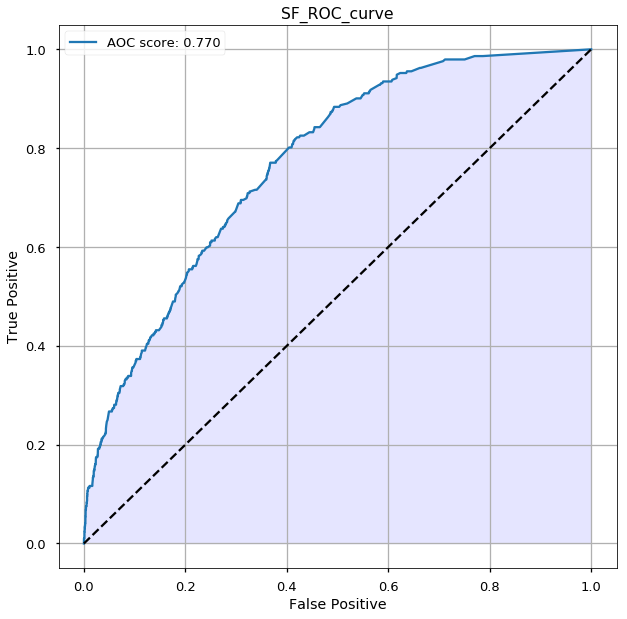

In [14]:
ROCplot, false_positive_SF, true_positive_SF, thresholds_SF = MT.plot_ROC_curve(Xholdout,yholdout,estimator_SF,title='SF_ROC_curve')

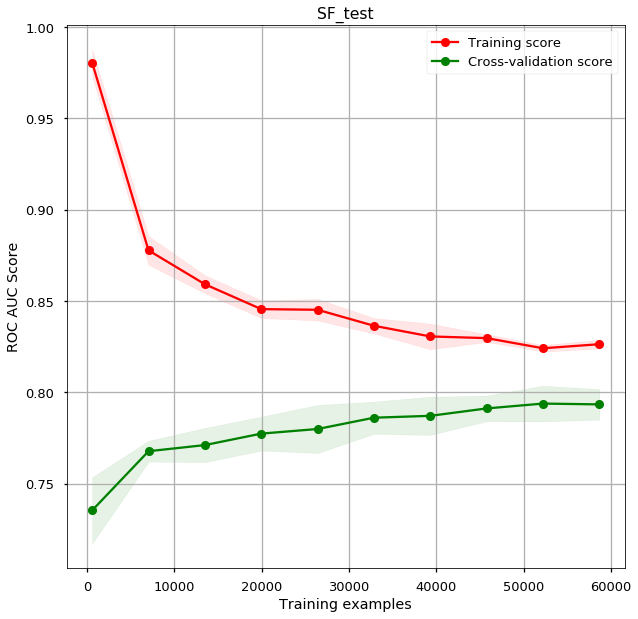

In [15]:
LC_SF = MT.plot_Learning_curve(estimator_SF,'SF_test',X,y,cv=5,n_jobs=4,train_sizes=np.linspace(.01, 1.0, 10))

### Predicting vehicle fires

In [16]:
X,y,Xholdout,yholdout,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='VF_pred',yearto_holdout=2018)

In [19]:
pipeline, gridsearch, testparams = MT.generate_pipeline_GB(test_parameters=test_parameters,select=True)

In [20]:
#Run grid search for the best model
Xcols, estimator_VF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (10, 20, 30), 'classify__learning_rate': (0.5, 1, 2), 'classify__max_depth': (5, 8, 10), 'classify__min_samples_leaf': (5, 10, 50)}
Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 37.3min
[Parallel(n_jobs=4)]: Done 405 out of 405 | elapsed: 71.6min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


done in 4310.342s

Best score: 0.744
Best parameters set:
	classify__learning_rate: 0.5
	classify__max_depth: 5
	classify__min_samples_leaf: 50
	classify__n_estimators: 10


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


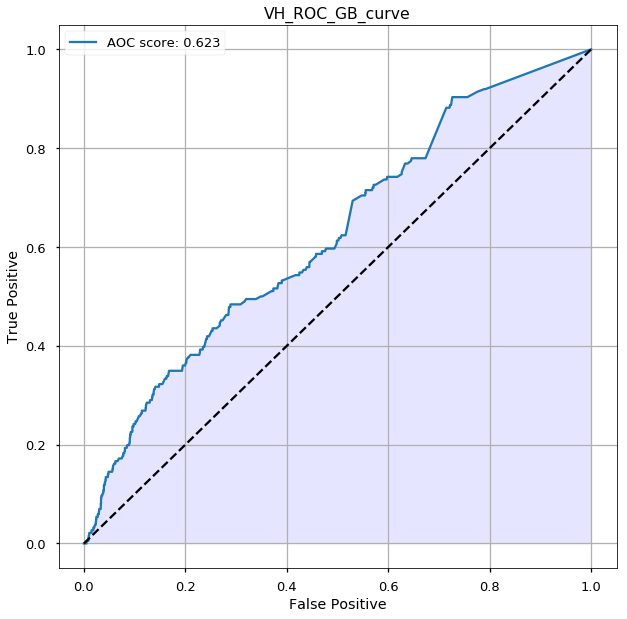

In [21]:
ROCplot, false_positive_SF, true_positive_SF, thresholds_SF = MT.plot_ROC_curve(Xholdout,yholdout,estimator_SF,title='VH_ROC_GB_curve')

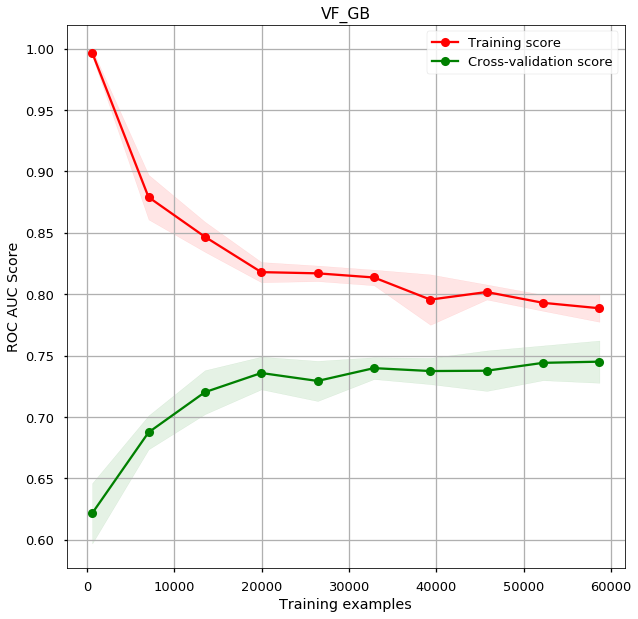

In [22]:
LC_VH = MT.plot_Learning_curve(estimator_VF,'VF_GB',X,y,cv=5,n_jobs=4,train_sizes=np.linspace(.01, 1.0, 10))

### Predicting external fires

In [23]:
X,y,Xholdout,yholdout,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='EF_pred',yearto_holdout=2018)

In [24]:
pipeline, gridsearch, testparams = MT.generate_pipeline_GB(test_parameters=test_parameters,select=True)

In [25]:
#Run grid search for the best model
Xcols, estimator_EF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (10, 20, 30), 'classify__learning_rate': (0.5, 1, 2), 'classify__max_depth': (5, 8, 10), 'classify__min_samples_leaf': (5, 10, 50)}
Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  9.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 35.8min
[Parallel(n_jobs=4)]: Done 405 out of 405 | elapsed: 73.0min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


done in 4395.665s

Best score: 0.832
Best parameters set:
	classify__learning_rate: 0.5
	classify__max_depth: 5
	classify__min_samples_leaf: 50
	classify__n_estimators: 10


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


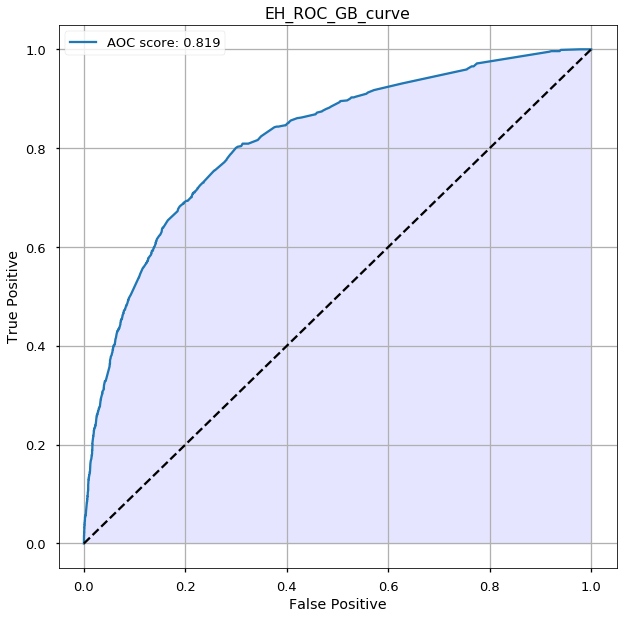

In [26]:
ROCplot, false_positive_EF, true_positive_EF, thresholds_EF = MT.plot_ROC_curve(Xholdout,yholdout,estimator_EF,title='EH_ROC_GB_curve')

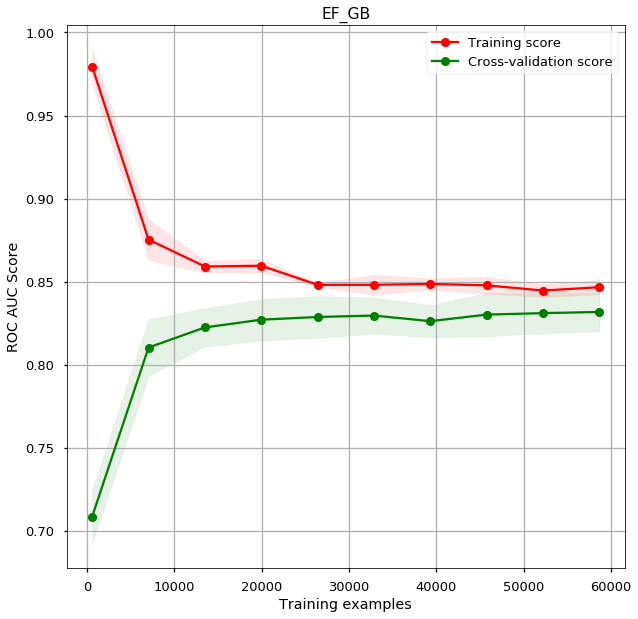

In [27]:
LC_EF = MT.plot_Learning_curve(estimator_EF,'EF_GB',X,y,cv=5,n_jobs=4,train_sizes=np.linspace(.01, 1.0, 10))